Kaggle Dataset: Bank Marketing

https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import math

In [2]:
# load the dataset from Kaggle
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")
print("Path to dataset files:", path)

data = pd.read_csv(path + "\\bank-additional-full.csv", sep=';')
print(data.shape)
print(data.head())

Path to dataset files: C:\Users\sunsh\.cache\kagglehub\datasets\henriqueyamahata\bank-marketing\versions\1
(41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon

Understand the dataset

- Check data range and variations
- Perform data cleaning
- Plot marketing result based on each column
- Drop irrelevant columns

In [3]:
# Basic data cleaning
data.dropna(inplace=True)
print(data.shape)

# Convert y column to binary
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Get unique values of column y
print(data['y'].unique())

(41188, 21)
[0 1]


Column: age, Min: 17, Max: 98
(40273, 21)


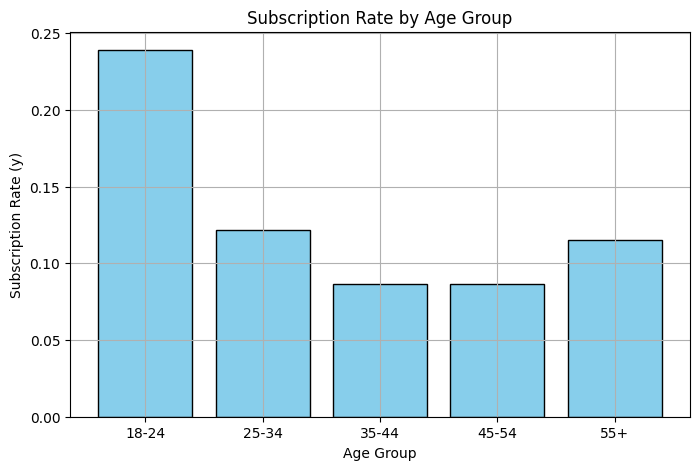

In [4]:
print(f"Column: age, Min: {data['age'].min()}, Max: {data['age'].max()}")
data = data[(data['age'] >= 18) & (data['age'] <= 60)]
print(data.shape)

# Create categorical groups for numerical column age
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the mean subscription rate for each age group
subscription_rate_age = data.groupby('age_group', observed=True)['y'].mean()

# Create a bar plot for the subscription rate by age group
plt.figure(figsize=(8, 5))
plt.bar(subscription_rate_age.index.astype(str), subscription_rate_age.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Age Group')
plt.grid(True)
plt.show()

Column: job, Unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


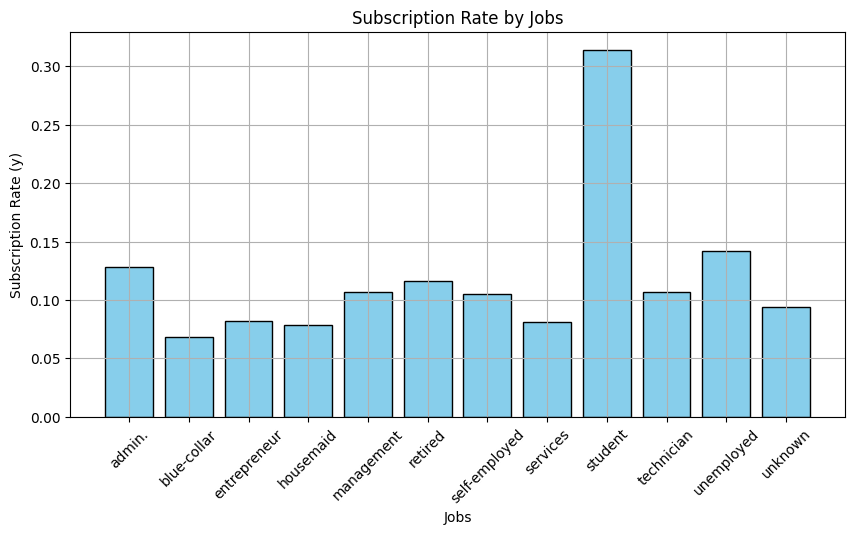

In [5]:
print(f"Column: job, Unique values: {data['job'].unique()}")

# Calculate the mean subscription rate for each job category
subscription_rate_job = data.groupby('job', observed=True)['y'].mean()

# Create a bar plot for the subscription rate by jobs
plt.figure(figsize=(10, 5))
plt.bar(subscription_rate_job.index.astype(str), subscription_rate_job.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Jobs')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Jobs')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [6]:
data['job_student'] = data['job'].apply(lambda x: 1 if x == 'student' else 0)

Column: marital, Unique values: ['married' 'single' 'divorced' 'unknown']


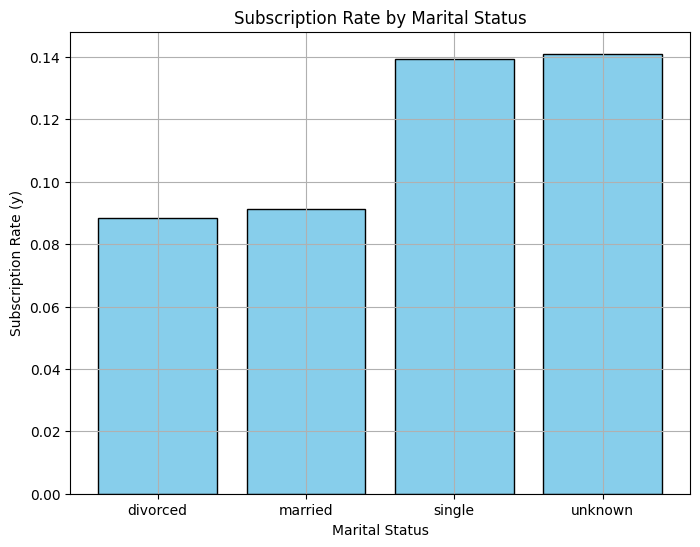

In [7]:
print(f"Column: marital, Unique values: {data['marital'].unique()}")

subscription_rate_marital = data.groupby('marital', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_marital.index.astype(str), subscription_rate_marital.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Marital Status')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Column: education, Unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


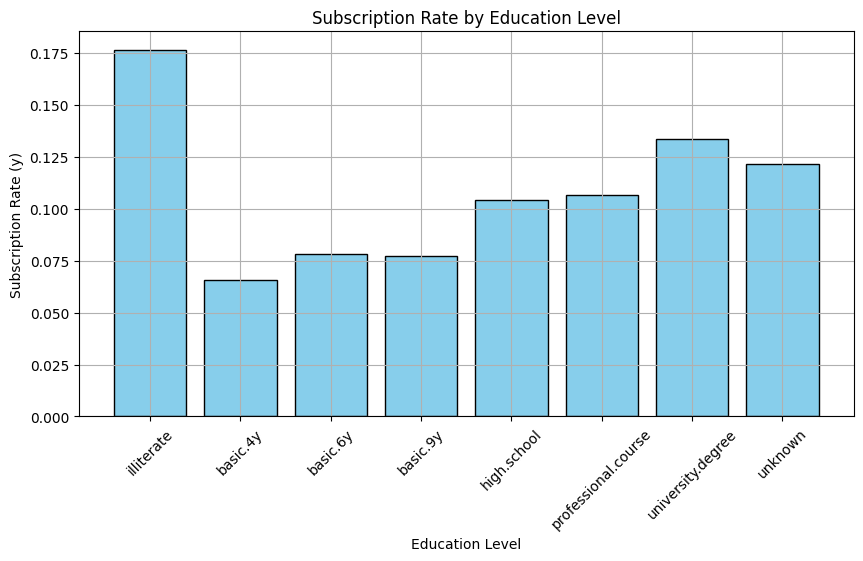

In [8]:
print(f"Column: education, Unique values: {data['education'].unique()}")

# Order categorical column education for better visualization
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']
data['education'] = pd.Categorical(data['education'], categories=education_order, ordered=True)

subscription_rate_education = data.groupby('education', observed=True)['y'].mean()

plt.figure(figsize=(10, 5))
plt.bar(subscription_rate_education.index.astype(str), subscription_rate_education.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Education Level')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [9]:
data['education_illiterate'] = data['education'].apply(lambda x: 1 if x == 'illiterate' else 0)

Column: default, Unique values: ['no' 'unknown' 'yes']


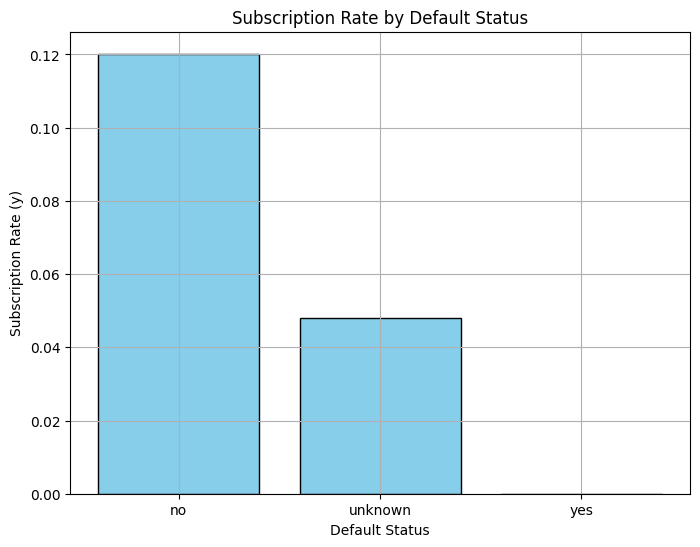

In [10]:
print(f"Column: default, Unique values: {data['default'].unique()}")

subscription_rate_default = data.groupby('default', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_default.index.astype(str), subscription_rate_default.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Default Status')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Default Status')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Column: housing, Unique values: ['no' 'yes' 'unknown']


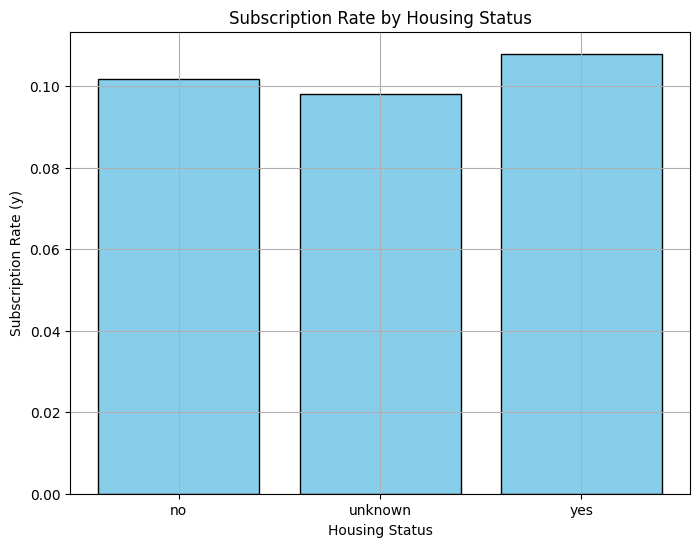

In [11]:
print(f"Column: housing, Unique values: {data['housing'].unique()}")

subscription_rate_housing = data.groupby('housing', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_housing.index.astype(str), subscription_rate_housing.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Housing Status')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Housing Status')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Column: loan, Unique values: ['no' 'yes' 'unknown']


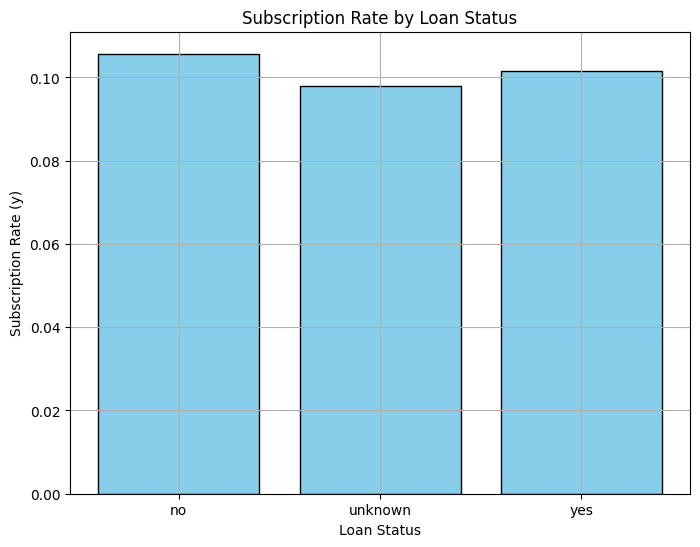

In [12]:
print(f"Column: loan, Unique values: {data['loan'].unique()}")

subscription_rate_loan = data.groupby('loan', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_loan.index.astype(str), subscription_rate_loan.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Loan Status')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Loan Status')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Column: contact, Unique values: ['telephone' 'cellular']


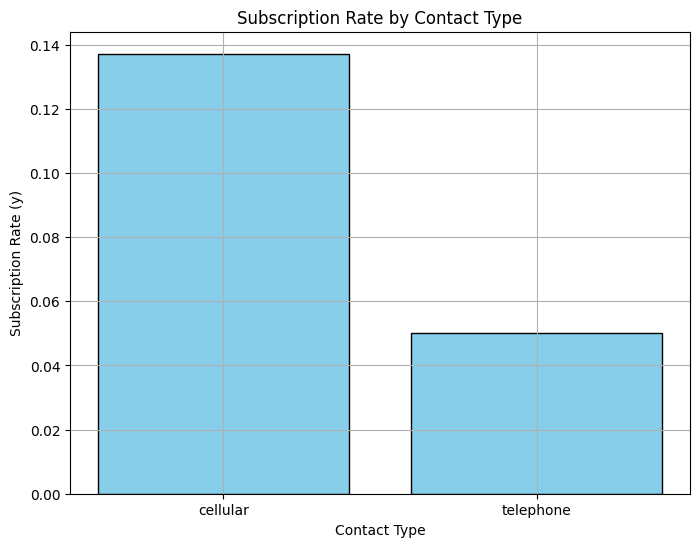

In [13]:
print(f"Column: contact, Unique values: {data['contact'].unique()}")

subscription_rate_contact = data.groupby('contact', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_contact.index.astype(str), subscription_rate_contact.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Contact Type')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Contact Type')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Column: month, Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


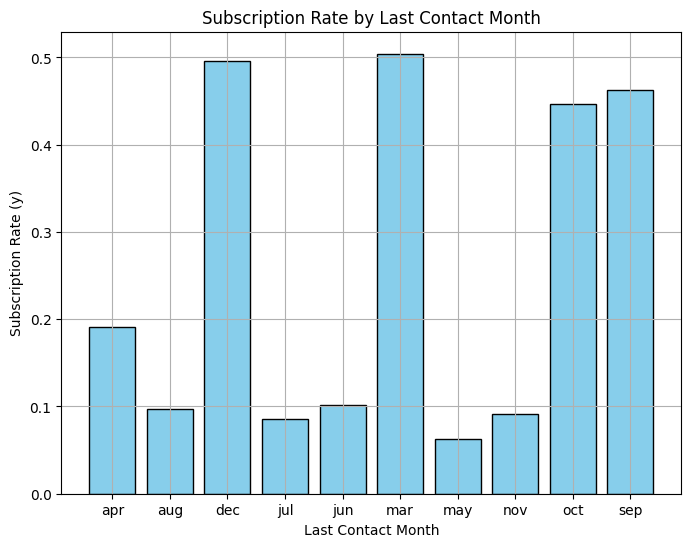

In [14]:
print(f"Column: month, Unique values: {data['month'].unique()}")

subscription_rate_month = data.groupby('month', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_month.index.astype(str), subscription_rate_month.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Last Contact Month')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Last Contact Month')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

Column: duration, Min: 0, Max: 4918


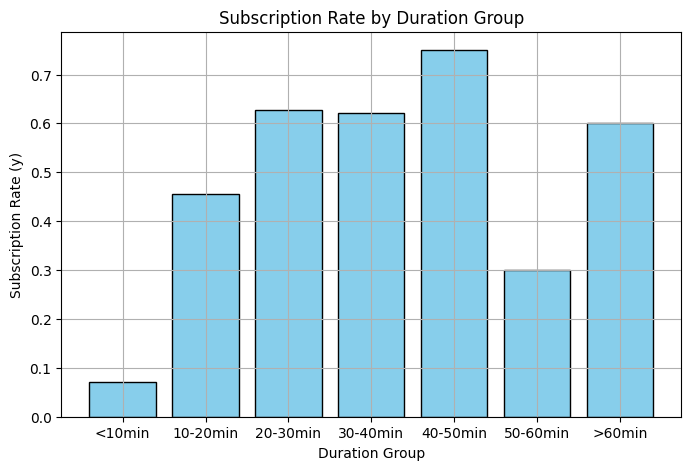

In [15]:
print(f"Column: duration, Min: {data['duration'].min()}, Max: {data['duration'].max()}")

# Create categorical groups for numerical column duration
duration_bins = [0, 600, 1200, 1800, 2400, 3000, 3600, 5000]
duration_labels = ['<10min', '10-20min', '20-30min', '30-40min', '40-50min', '50-60min', '>60min']
data['duration_group'] = pd.cut(data['duration'], bins=duration_bins, labels=duration_labels, right=False)

subscription_rate_duration = data.groupby('duration_group', observed=True)['y'].mean()

plt.figure(figsize=(8, 5))
plt.bar(subscription_rate_duration.index.astype(str), subscription_rate_duration.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Duration Group')
plt.grid(True)
plt.show()

Column: campaign, Min: 1, Max: 56


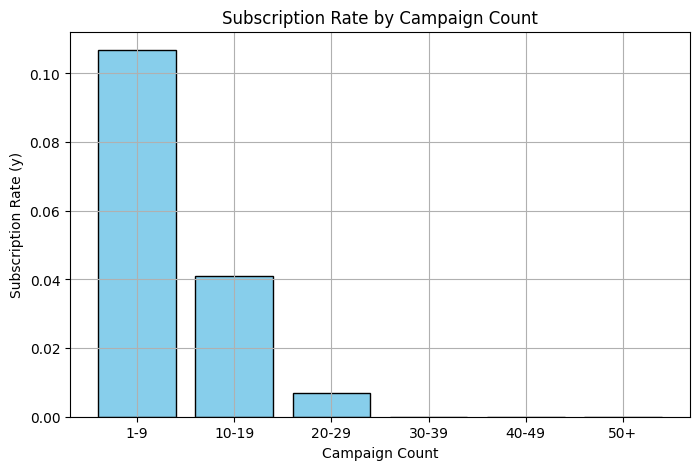

In [16]:
print(f"Column: campaign, Min: {data['campaign'].min()}, Max: {data['campaign'].max()}")

cc_bins = [1, 10, 20, 30, 40, 50, 60]
cc_labels = ['1-9', '10-19', '20-29', '30-39', '40-49', '50+']
data['campaign_group'] = pd.cut(data['campaign'], bins=cc_bins, labels=cc_labels, right=False)

subscription_rate_cc = data.groupby('campaign_group', observed=True)['y'].mean()

plt.figure(figsize=(8, 5))
plt.bar(subscription_rate_cc.index.astype(str), subscription_rate_cc.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Campaign Count')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Campaign Count')
plt.grid(True)
plt.show()

Column: poutcome, Unique values: ['nonexistent' 'failure' 'success']


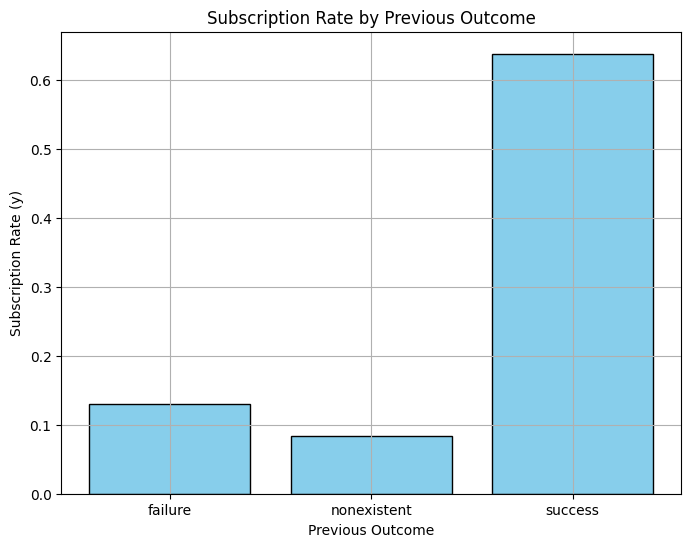

In [17]:
print(f"Column: poutcome, Unique values: {data['poutcome'].unique()}")

subscription_rate_poutcome = data.groupby('poutcome', observed=True)['y'].mean()

plt.figure(figsize=(8, 6))
plt.bar(subscription_rate_poutcome.index.astype(str), subscription_rate_poutcome.values, 
        color='skyblue', edgecolor='black')
plt.xlabel('Previous Outcome')
plt.ylabel('Subscription Rate (y)')
plt.title('Subscription Rate by Previous Outcome')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

In [18]:
# Split the data into features and target variable
X = data[['age_group', 'job_student', 'marital', 'education_illiterate', 'default', 'contact', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
y = data['y']

In [19]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['age_group', 'marital', 'default', 'contact', 'poutcome'], drop_first=True)
print(X.shape)
print(X.head())


(40273, 19)
   job_student  education_illiterate  emp.var.rate  cons.price.idx  \
0            0                     0           1.1          93.994   
1            0                     0           1.1          93.994   
2            0                     0           1.1          93.994   
3            0                     0           1.1          93.994   
4            0                     0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  age_group_25-34  age_group_35-44  \
0          -36.4      4.857       5191.0            False            False   
1          -36.4      4.857       5191.0            False            False   
2          -36.4      4.857       5191.0            False             True   
3          -36.4      4.857       5191.0            False             True   
4          -36.4      4.857       5191.0            False            False   

   age_group_45-54  age_group_55+  marital_married  marital_single  \
0            False          

In [20]:
# Split the data into training and testing sets
train_size = int(0.9 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

print(X_train.shape)
print(X_test.shape)

(36245, 19)
(4028, 19)


In [21]:
# feature normalization
scaler = StandardScaler()

numerical_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
print(X_train.head(5))

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

   job_student  education_illiterate  emp.var.rate  cons.price.idx  \
0            0                     0      0.512432        0.707292   
1            0                     0      0.512432        0.707292   
2            0                     0      0.512432        0.707292   
3            0                     0      0.512432        0.707292   
4            0                     0      0.512432        0.707292   

   cons.conf.idx  euribor3m  nr.employed  age_group_25-34  age_group_35-44  \
0       1.179693   0.574872     0.092128            False            False   
1       1.179693   0.574872     0.092128            False            False   
2       1.179693   0.574872     0.092128            False             True   
3       1.179693   0.574872     0.092128            False             True   
4       1.179693   0.574872     0.092128            False            False   

   age_group_45-54  age_group_55+  marital_married  marital_single  \
0            False           True       

C:\Users\sunsh\AppData\Local\Temp\ipykernel_29468\1151865021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
C:\Users\sunsh\AppData\Local\Temp\ipykernel_29468\1151865021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [22]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    z = z.astype(float)
    g = 1/(1+np.exp(-z))
    
    return g

In [23]:
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost

In [24]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw

In [25]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [ ]:
# convert pandas dataframe to numpy array
m, n = X_train.shape
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(n).reshape(-1,1) - 0.5)
initial_b = 0.01

# Some gradient descent settings
iterations = 100
alpha = 0.1

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

C:\Users\sunsh\AppData\Local\Temp\ipykernel_29468\4135190203.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


Iteration    0: Cost     0.64   
Iteration   10: Cost     0.39   
Iteration   20: Cost     0.31   
Iteration   30: Cost     0.28   
Iteration   40: Cost     0.27   
Iteration   50: Cost     0.26   
Iteration   60: Cost     0.25   
Iteration   70: Cost     0.25   
Iteration   80: Cost     0.25   
Iteration   90: Cost     0.25   
Iteration   99: Cost     0.24   


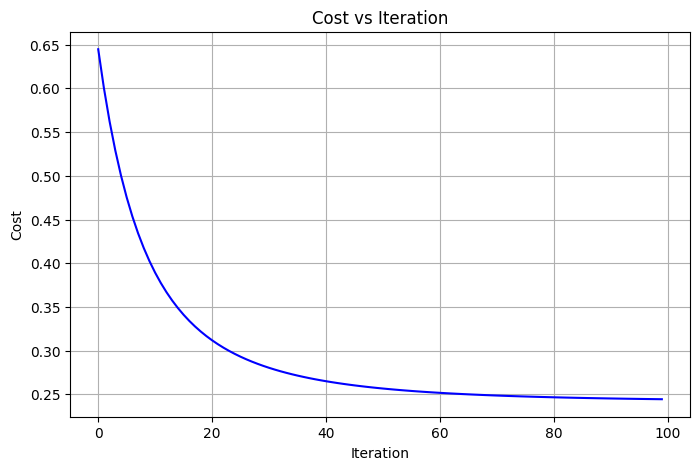

In [28]:
# plot the cost function over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), J_history, color='blue')
plt.title('Cost vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [29]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    return p

In [30]:
# predict loan status with the testing set
y_pred = predict(X_test, w, b)
print(f"Test Accuracy: {np.mean(y_pred == y_test) * 100:.2f}%")

Test Accuracy: 55.66%


In [31]:
# compute cost with the testing set
test_cost = compute_cost(X_test, y_test, w, b)
print(f"test Cost: {test_cost[0]:.2f}")

test Cost: 0.90


By applying logistic regression, the test accuray seems pretty low (55.66%).

Now let's look deeper into the value distribution of each feature.

Bank client data analysis:

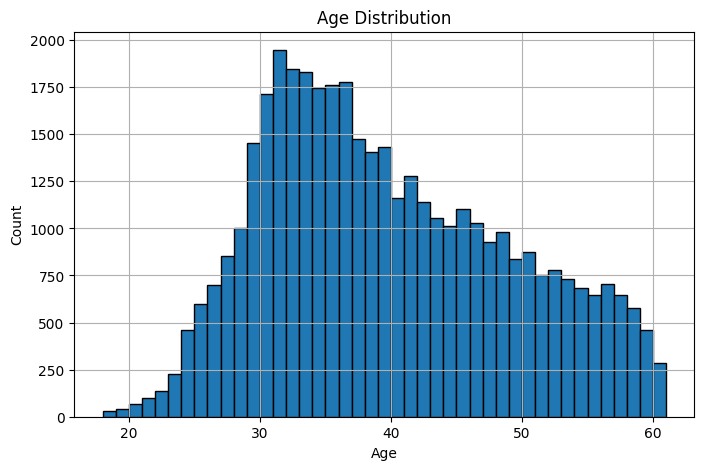

In [35]:
# understand the distribution of the features

plt.figure(figsize=(8, 5))
plt.hist(data['age'], bins=range(min(data['age']), max(data['age']) + 2), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [63]:
q1 = data['age'].quantile(q = 0.25)
q2 = data['age'].quantile(q = 0.5)
q3 = data['age'].quantile(q = 0.75)
q4 = q3 + 1.5 * (q3 - q1)

print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}")

data['age_group_new'] = pd.cut(data['age'], bins=[0, q1, q2, q3, q4], labels=['<Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-Q4'], right=False)

Q1: 32.0, Q2: 38.0, Q3: 46.0, Q4: 67.0


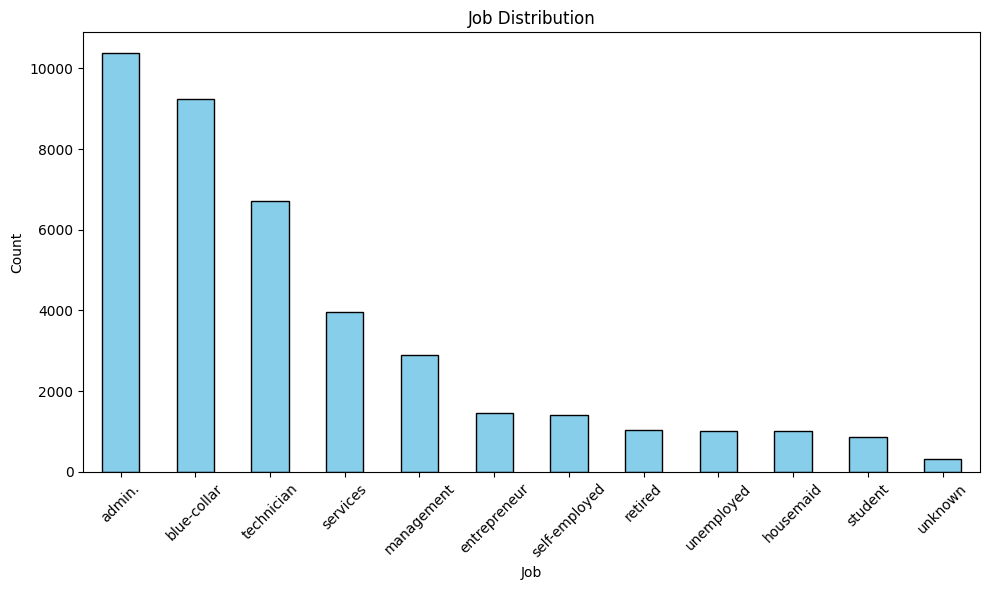

In [36]:
# Get counts of each job category
job_counts = data['job'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

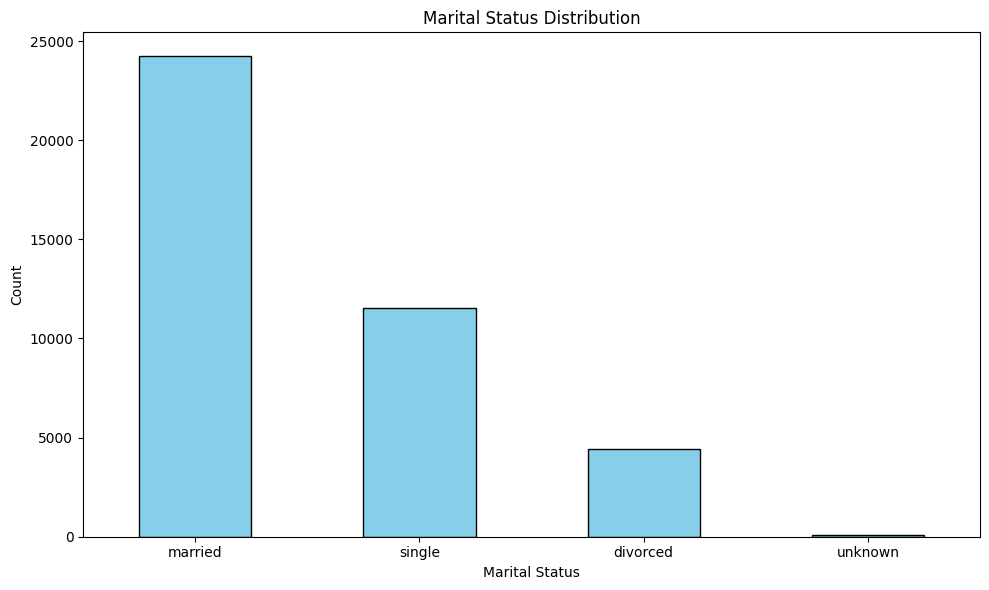

In [37]:
marital_counts = data['marital'].value_counts()

plt.figure(figsize=(10, 6))
marital_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

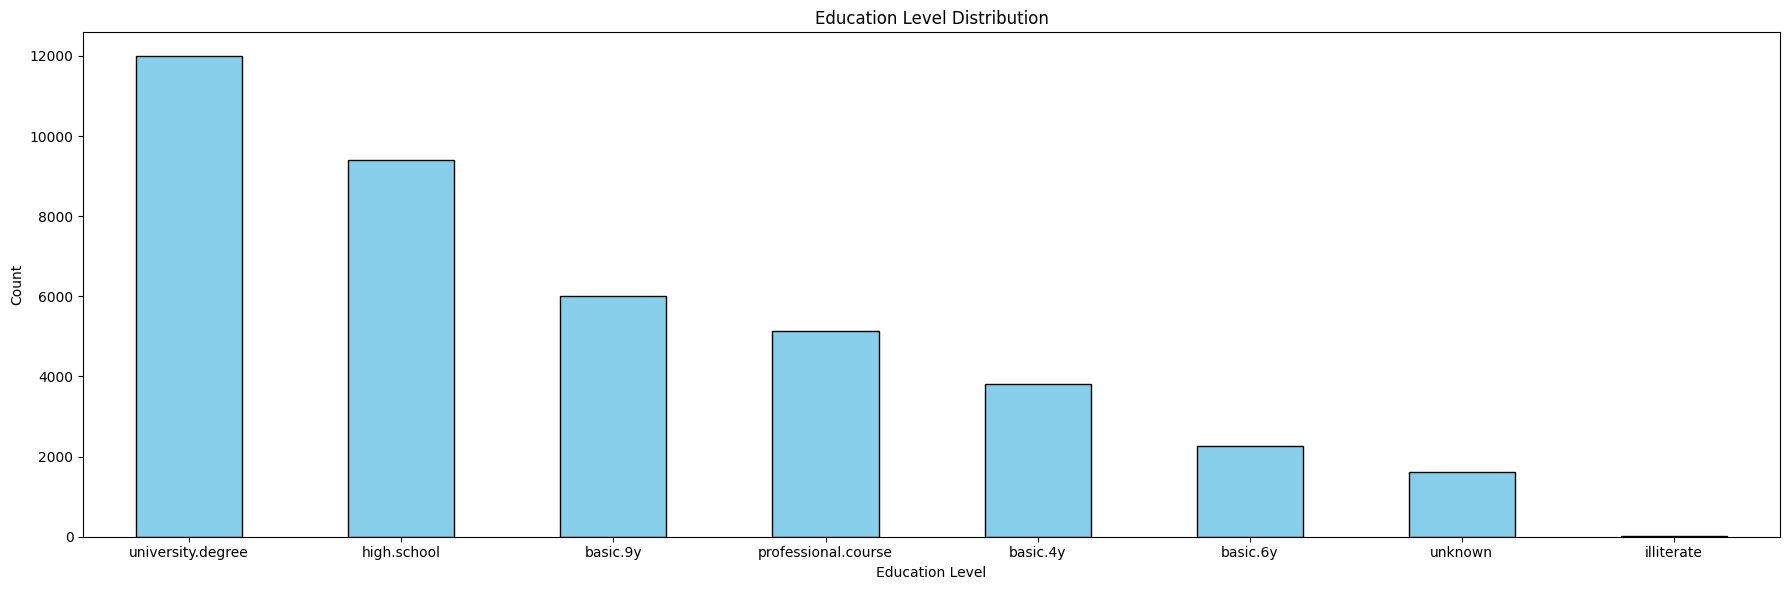

In [39]:
edu_counts = data['education'].value_counts()

plt.figure(figsize=(18, 6))
edu_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

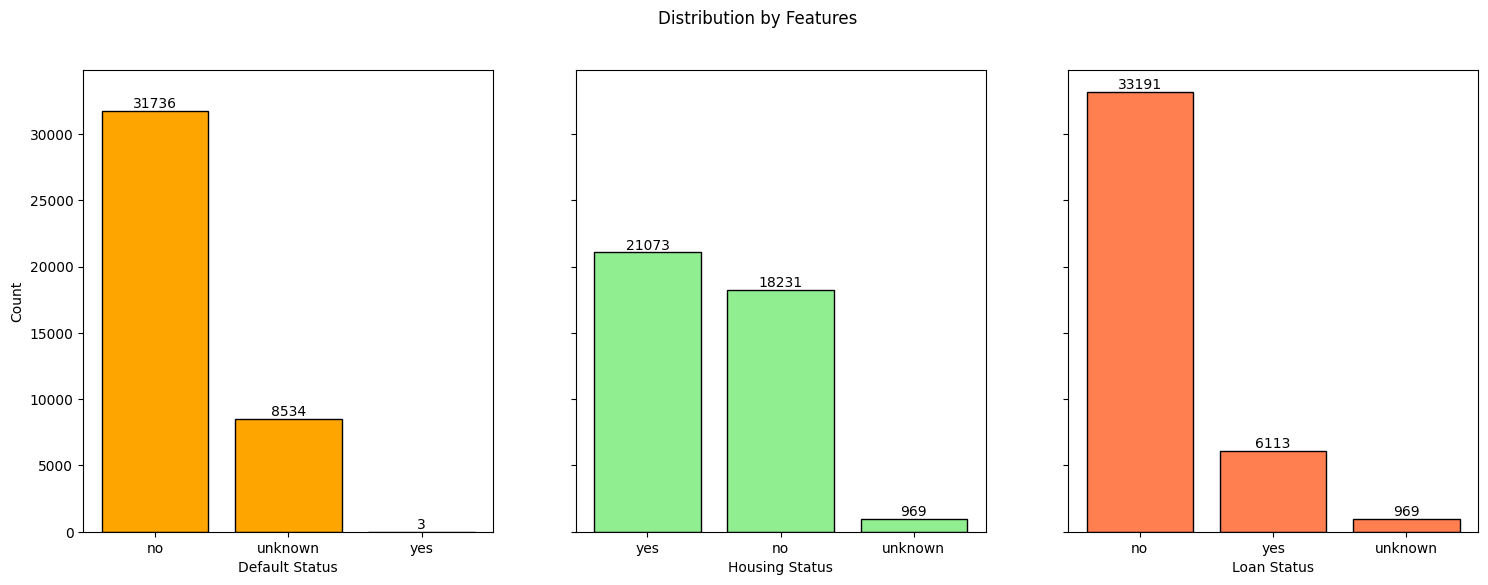

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

default_counts = data['default'].value_counts()
bars = ax[0].bar(default_counts.index.astype(str), default_counts.values, color='orange', edgecolor='black')
ax[0].set_xlabel('Default Status')
ax[0].bar_label(bars)

housing_counts = data['housing'].value_counts()
bars = ax[1].bar(housing_counts.index.astype(str), housing_counts.values, color='lightgreen', edgecolor='black')
ax[1].set_xlabel('Housing Status')
ax[1].bar_label(bars)

loan_counts = data['loan'].value_counts()
bars = ax[2].bar(loan_counts.index.astype(str), loan_counts.values, color='coral', edgecolor='black')
ax[2].set_xlabel('Loan Status')
ax[2].bar_label(bars)

fig.suptitle('Distribution by Features')
ax[0].set_ylabel('Count')

plt.show()

Last Contact of Current Campaign analysis:

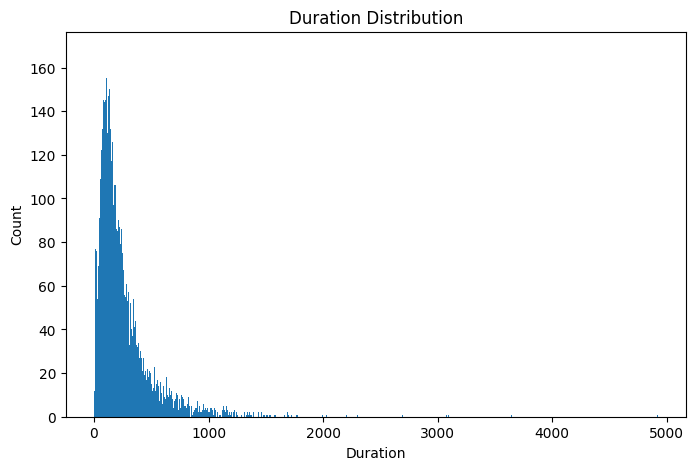

In [50]:
plt.figure(figsize=(8, 5))
plt.hist(data['duration'], bins=range(min(data['duration']), max(data['duration']) + 2))
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [61]:
q1 = data['duration'].quantile(q = 0.25)
q2 = data['duration'].quantile(q = 0.5)
q3 = data['duration'].quantile(q = 0.75)
q4 = q3 + 1.5 * (q3 - q1)

print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}")

data['duration_group_new'] = pd.cut(data['duration'], bins=[0, q1, q2, q3, q4, data['duration'].max()+1], labels=['<Q1', 'Q1-Q2', 'Q2-Q3', 'Q3-Q4', '>Q4'], right=False)

Q1: 102.0, Q2: 179.0, Q3: 319.0, Q4: 644.5


In [55]:
# If the duration is 0, then the subscription rate is 0
data[data['duration'] == 0]['y'].unique()

array([0])

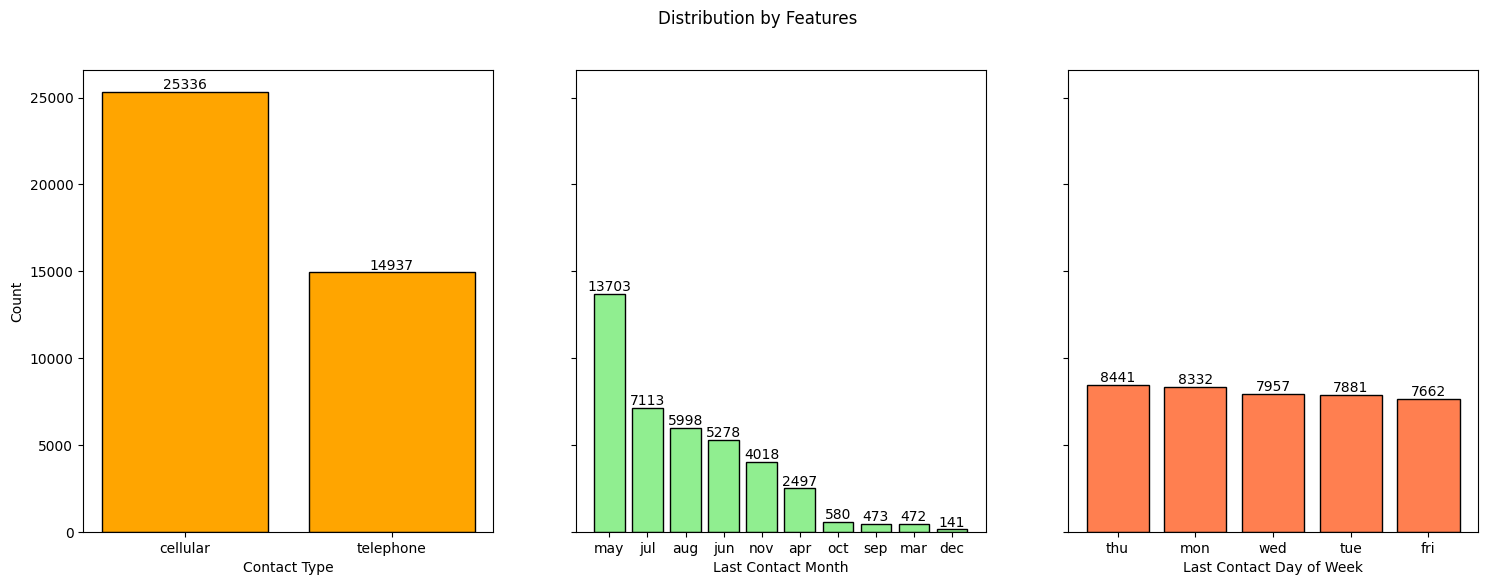

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

contact_counts = data['contact'].value_counts()
bars = ax[0].bar(contact_counts.index.astype(str), contact_counts.values, color='orange', edgecolor='black')
ax[0].set_xlabel('Contact Type')
ax[0].bar_label(bars)

month_counts = data['month'].value_counts()
bars = ax[1].bar(month_counts.index.astype(str), month_counts.values, color='lightgreen', edgecolor='black')
ax[1].set_xlabel('Last Contact Month')
ax[1].bar_label(bars)

day_counts = data['day_of_week'].value_counts()
bars = ax[2].bar(day_counts.index.astype(str), day_counts.values, color='coral', edgecolor='black')
ax[2].set_xlabel('Last Contact Day of Week')
ax[2].bar_label(bars)

fig.suptitle('Distribution by Features')
ax[0].set_ylabel('Count')

plt.show()

Social & Economic Context Attributes analysis:

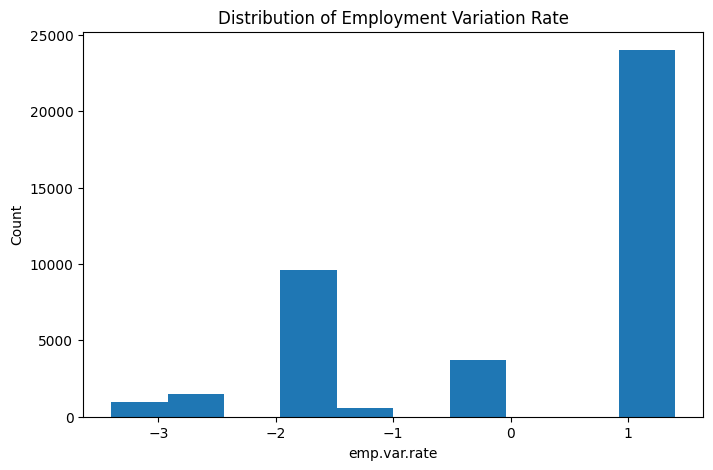

In [65]:
plt.figure(figsize=(8, 5))
plt.hist(data['emp.var.rate'])
plt.title('Distribution of Employment Variation Rate')
plt.xlabel('emp.var.rate')
plt.ylabel('Count')
plt.show()

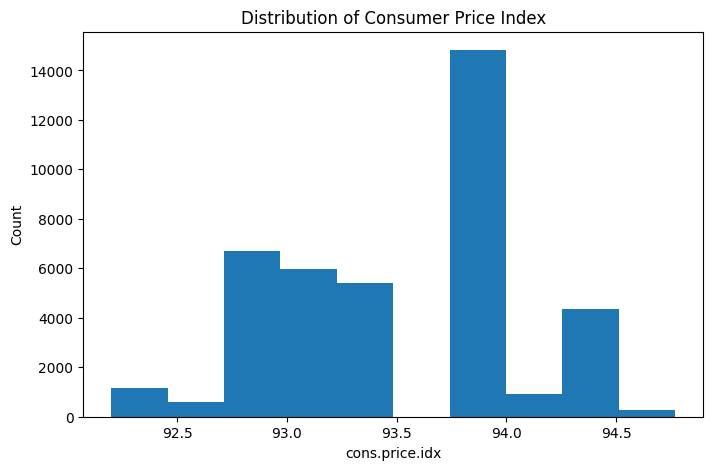

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(data['cons.price.idx'])
plt.title('Distribution of Consumer Price Index')
plt.xlabel('cons.price.idx')
plt.ylabel('Count')
plt.show()

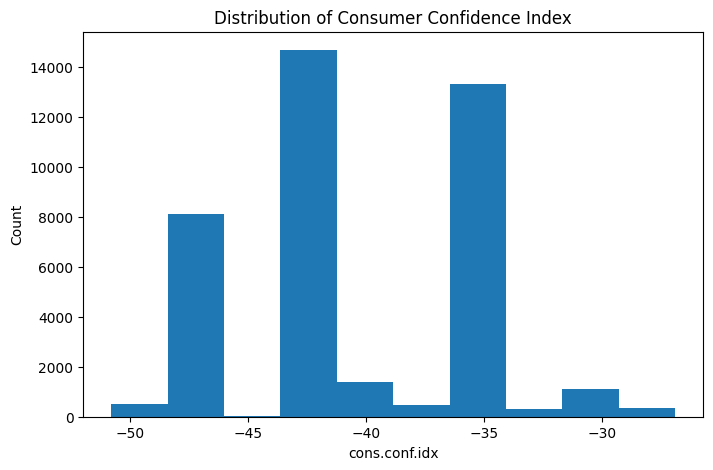

In [67]:
plt.figure(figsize=(8, 5))
plt.hist(data['cons.conf.idx'])
plt.title('Distribution of Consumer Confidence Index')
plt.xlabel('cons.conf.idx')
plt.ylabel('Count')
plt.show()

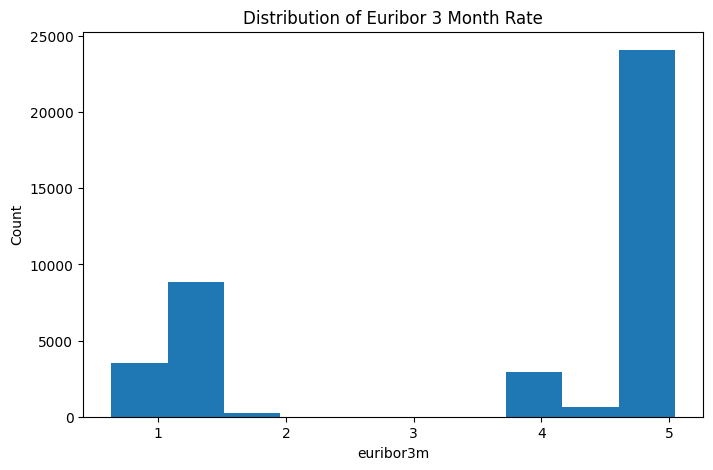

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(data['euribor3m'])
plt.title('Distribution of Euribor 3 Month Rate')
plt.xlabel('euribor3m')
plt.ylabel('Count')
plt.show()

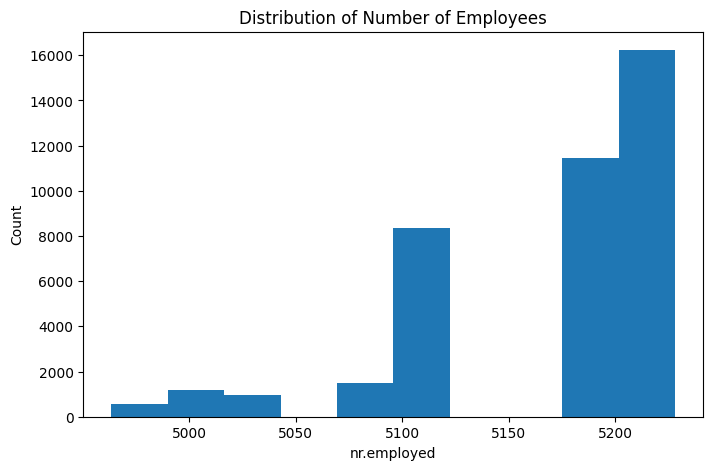

In [71]:
plt.figure(figsize=(8, 5))
plt.hist(data['nr.employed'])
plt.title('Distribution of Number of Employees')
plt.xlabel('nr.employed')
plt.ylabel('Count')
plt.show()

In [76]:
X = data[['age_group_new', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration_group_new', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
# one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['age_group_new', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration_group_new', 'poutcome'], drop_first=True)
print(X.shape)
X.head(5)

(40273, 58)


,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_group_new_Q1-Q2,age_group_new_Q2-Q3,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,duration_group_new_Q1-Q2,duration_group_new_Q2-Q3,duration_group_new_Q3-Q4,duration_group_new_>Q4,poutcome_nonexistent,poutcome_success
0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,...,True,False,False,False,False,True,False,False,True,False
1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,...,True,False,False,False,True,False,False,False,True,False
2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,True,False,...,True,False,False,False,False,True,False,False,True,False
3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,True,...,True,False,False,False,True,False,False,False,True,False
4,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,...,True,False,False,False,False,True,False,False,True,False


In [77]:
y = data['y']
print(y.shape)

(40273,)


In [80]:
# count the percentage of y = 1
print(f"Percentage of y = 1: {y.mean() * 100:.2f}%")

Percentage of y = 1: 10.49%


In [78]:
# Split the data into training and testing sets, such that 90% of the data is used for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=77)

In [79]:
numerical_columns = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_train.head(5)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_group_new_Q1-Q2,age_group_new_Q2-Q3,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,duration_group_new_Q1-Q2,duration_group_new_Q2-Q3,duration_group_new_Q3-Q4,duration_group_new_>Q4,poutcome_nonexistent,poutcome_success
23714,0.505119,0.183362,-0.340260,0.820914,-0.251397,0.995874,0.750887,0.832377,False,False,...,False,True,False,False,False,False,False,False,True,False
26255,1.933955,0.183362,-0.340260,-0.154082,-0.680721,-0.314228,0.231037,0.369393,False,True,...,False,True,False,False,False,False,False,False,True,False
32456,-0.209299,0.183362,1.754648,-1.259078,-1.220896,-1.246844,-1.390119,-1.016691,True,False,...,False,False,False,False,False,False,False,False,False,False
14515,0.147910,0.183362,-0.340260,0.820914,0.582619,-0.469664,0.750300,0.832377,False,False,...,False,False,True,False,False,True,False,False,True,False
29688,0.505119,0.183362,-0.340260,-1.259078,-0.900662,-1.446690,-1.336139,-1.016691,True,False,...,True,False,False,False,False,False,False,False,True,False


In [83]:
# convert pandas dataframe to numpy array
m, n = X_train.shape
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

In [84]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(n).reshape(-1,1) - 0.5)
initial_b = 0.01

# Some gradient descent settings
iterations = 100
alpha = 0.1

w,b, J_history,_ = gradient_descent(X_train_np ,y_train_np, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

C:\Users\sunsh\AppData\Local\Temp\ipykernel_29468\4135190203.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


Iteration    0: Cost     0.63   
Iteration   10: Cost     0.38   
Iteration   20: Cost     0.32   
Iteration   30: Cost     0.30   
Iteration   40: Cost     0.29   
Iteration   50: Cost     0.28   
Iteration   60: Cost     0.28   
Iteration   70: Cost     0.27   
Iteration   80: Cost     0.27   
Iteration   90: Cost     0.27   
Iteration   99: Cost     0.27   


In [85]:
# predict loan status with the testing set
y_pred = predict(X_test_np, w, b)
print(f"Test Accuracy: {np.mean(y_pred == y_test_np) * 100:.2f}%")

Test Accuracy: 90.42%


In [86]:
# compute cost with the testing set
test_cost = compute_cost(X_test_np, y_test_np, w, b)
print(f"test Cost: {test_cost[0]:.2f}")

test Cost: 0.27


In [82]:
# Use sklearn's LogisticRegression model

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Test Accuracy: {np.mean(y_pred == y_test) * 100:.2f}%")


Test Accuracy: 91.14%


It appears that if the training and testing datasets are not shuffled, the model will not be able to generalize well to unseen data. This is because the model may learn patterns that are specific to the order of the training data, rather than the underlying distribution of the data itself. Shuffling the data helps to ensure that the model learns from a representative sample of the data, which can improve its performance on unseen data.

In [88]:
train_size = int(0.9 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

print(f"Test Accuracy: {np.mean(y_pred == y_test) * 100:.2f}%")

Test Accuracy: 62.04%


C:\Users\sunsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
